# Supervised Learning for Porosity-Permeability Relationships  

  
Core data analysis is essential for understanding subsurface geological formations. It is typically obtained at specific intervals on a limited number of wells within a field and then referenced for other wells. Core data is analyzed for measurements like porosity and permeability. Porosity, which influences permeability, affects fluid flow in reservoirs. A general approach is plotting porosity against permeability using regression as they aren’t directly correlated. This equation then predicts permeability from porosity in any well.

In [1]:
# Import libraries
from IPython.display import Math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# Load data
core_data = pd.read_csv("../../data/15_9-19A-CORE.csv", na_values=' ')

In [3]:
# View of the dataframe
core_data.head()

,DEPTH,OrigDepth,CORE_NO,SAMPLE,CKHG,CKHL,CKVG,CKVL,CPOR,CPORV,So,Sw,CGD,CGDV
0,3838.60,3837.00,1,1,13.80,11.500,NaN,NaN,17.0,NaN,NaN,NaN,2.66,NaN
1,3838.85,3837.25,1,2,NaN,NaN,NaN,NaN,14.8,NaN,NaN,NaN,2.67,NaN
2,3839.15,3837.55,1,3,25.20,21.400,3.94,3.16,10.8,NaN,NaN,NaN,2.69,NaN
3,3839.40,3837.80,1,4,1.02,0.694,NaN,NaN,12.8,NaN,NaN,NaN,2.70,NaN
4,3839.48,3837.88,1,5,NaN,NaN,NaN,NaN,NaN,18.8,52.9,36.4,NaN,2.68


In [4]:
# Get the column names
core_data.columns

Index(['DEPTH', 'OrigDepth', 'CORE_NO', 'SAMPLE', 'CKHG', 'CKHL', 'CKVG',
       'CKVL', 'CPOR', 'CPORV', 'So', 'Sw', 'CGD', 'CGDV'],
      dtype='object')

In [5]:
# Columns and Rows
core_data.shape

(728, 14)

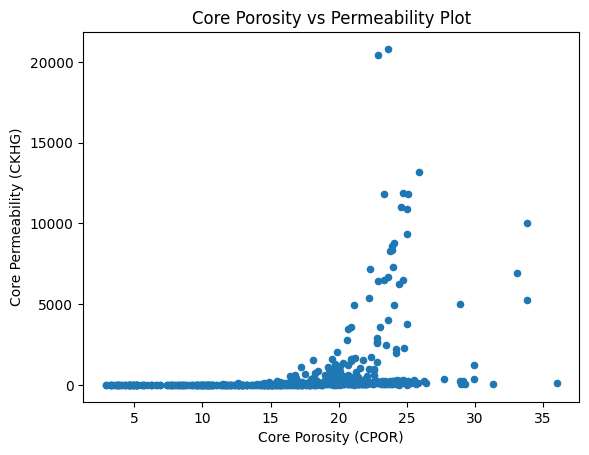

In [6]:
## Plotting Porosity vs Permeability
core_data.plot(kind="scatter", x="CPOR", y="CKHG")
plt.xlabel("Core Porosity (CPOR)")
plt.ylabel("Core Permeability (CKHG)")
plt.title("Core Porosity vs Permeability Plot")
plt.show()


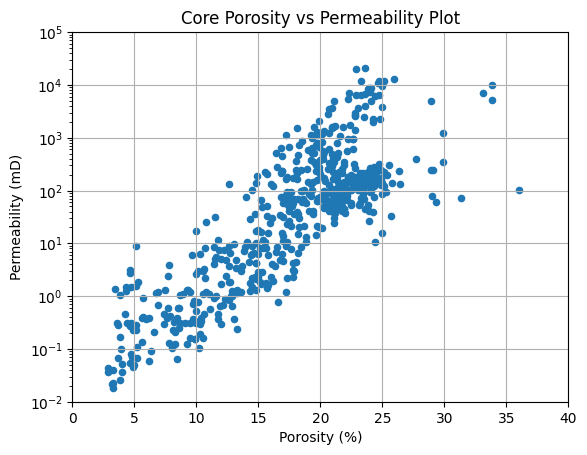

In [7]:
# Make it better
core_data.plot(kind="scatter", x="CPOR", y="CKHG")
plt.yscale('log')
plt.axis([0, 40, 0.01, 100000])
plt.grid(True)
plt.xlabel("Porosity (%)")
plt.ylabel("Permeability (mD)")
plt.title("Core Porosity vs Permeability Plot")
plt.show()


# Linear Regression

---
<span style='color:Blue'>
    
Let's use the equations provided in the lectures to calculate the slope $m$ and intersection $b$ for the linear regression line.

Equantions for the linear regression equation

$$
\hat{y} = mx + b
$$

where

$$
b = \frac{ \left( \sum{y} \right) \left( \sum{x^2} \right) - \left( \sum{x} \right) \left( \sum{xy} \right)}{n \left( \sum{x^2} \right) - \left( \sum{x} \right)^2}
$$

and

$$
m = \frac{ n \left( \sum{xy} \right) - \left( \sum{x} \right) \left( \sum{y} \right)}{n \left( \sum{x^2} \right) - \left( \sum{x} \right)^2}
$$
    
</span>

Note: this expression is just one of the possible derivation one can do to compute the regression coefficients.

In [10]:
# Load data
core_data = pd.read_csv("../../data/15_9-19A-CORE.csv", na_values=' ')

X = core_data.loc[:, ['CPOR', 'CKHG']].dropna()  

y = np.log10(X['CKHG'])

# This is the price to convert pandas to numpy to vanilla python
x = X.drop(['CKHG'], axis=1).to_numpy()[:, 0]


sum_x = x.sum()
sum_y = y.sum()
xy = x * y
sum_xy = xy.sum()
x2 = x ** 2
y2 = y ** 2
sum_x2 = x2.sum()
sum_y2 = y2.sum()
n = len(x)

b = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x ** 2)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)

pearson_r = (n * sum_xy - sum_x * sum_y) / np.sqrt((n * sum_x2 - sum_x**2) * ( n * sum_y2 - sum_y**2))

display(Math(f'm = {m:.4f}'))
display(Math(f'b = {b:.4f}'))
display(Math(f'Pearson \\; r = {pearson_r:.4f}'))
display(Math(f'R^2 = {pearson_r**2:.4f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
y_hat = b + m * x

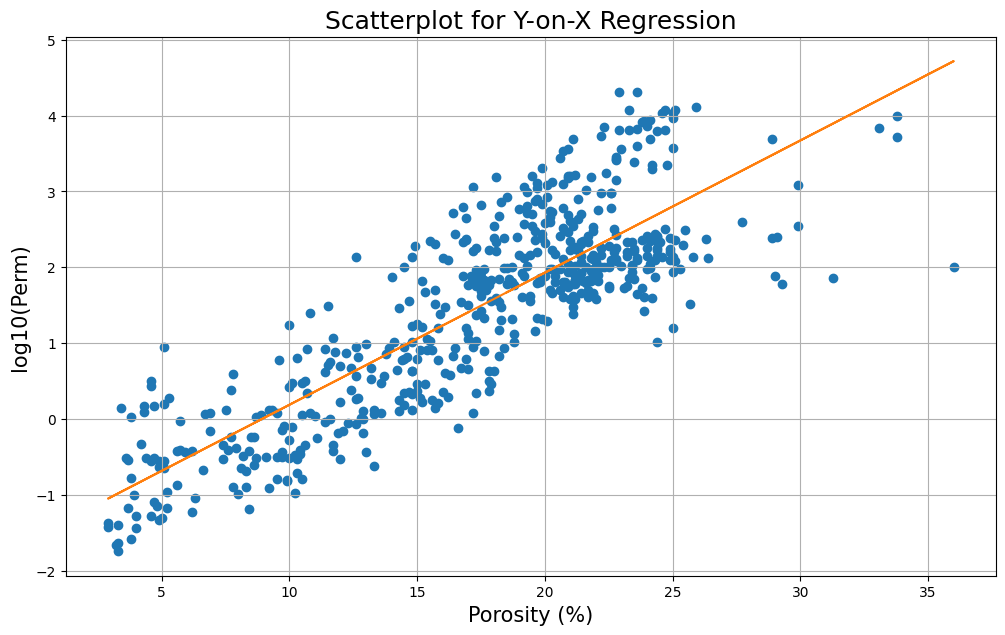

In [12]:
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x, y)
ax.plot(x, y_hat, color='tab:orange')  # Using 'color' instead of 'tab:orange' as a string
ax.set_xlabel('Porosity (%)', fontsize=15)
ax.set_ylabel('log10(Perm)', fontsize=15)
plt.title("Scatterplot for Y-on-X Regression", fontsize=18)
ax.grid()

plt.show()

# Porosity and Permeability - Linear Regression - ML libraries


For generating a Porosity-Permeability linear regression,the Ordinary Least Squares (OLS) method from the statsmodels library has been used.   
  
We will assign our x value as Core Porosity (CPOR) and our y value as the log10 of Core Permeability (CKH). The y value will be the one we are aiming to build our prediction model from.  
   

In [16]:
X = core_data.loc[:, ['CPOR', 'CKHG']].dropna()  

y = np.log10(X['CKHG'])
x = X.drop(['CKHG'], axis=1)


In [17]:
regressor = LinearRegression()
regressor.fit(x, y)

y_predict = regressor.predict(x)

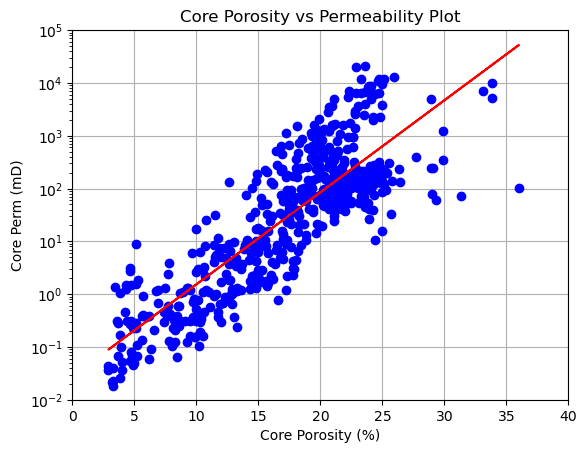

In [379]:
plt.axis([0, 40, 0.01, 100000])
plt.plot(core_data['CPOR'], core_data['CKHG'], 'bo')
plt.yscale('log')
plt.grid(True)
plt.ylabel('Core Perm (mD)')
plt.xlabel('Core Porosity (%)')
plt.title("Core Porosity vs Permeability Plot")
plt.plot(x, 10**regressor.predict(x), 'r-')

## Predicting a Continuous Permeability from Log Porosity
Now that we have our equation, we can apply this to our log porosity to generate a continuous permeability curve.  

In [380]:
# Load data
well = pd.read_csv('../../data/15_9-19.csv', skiprows=[1])

In [381]:
# Show Data
well.head()

,DEPTH,CALI,COAL,DT,DT_LOG,DTS,DTS_LOG,GR,NPHI,PHIE,PHIEC,PHIT,PHITC,RHOB,RHOB_LOG,RT,RW,TEMP
0,3500.0183,9.315,0,76.7292,76.7292,157.1754,157.1754,36.621,0.1542,0.1122,0.1098,0.1209,0.1186,2.4602,2.460,1.791,0.0211,94.5855
1,3500.1707,9.324,0,77.2473,77.2473,158.9566,158.9566,36.374,0.1694,0.1074,0.1060,0.1159,0.1146,2.4680,2.468,1.756,0.0211,94.5897
2,3500.3231,9.338,0,77.8462,77.8462,159.7642,159.7642,30.748,0.1776,0.1082,0.1079,0.1127,0.1125,2.4730,2.473,1.720,0.0211,94.5940
3,3500.4755,9.329,0,78.3571,78.3571,158.7547,158.7547,29.795,0.1767,0.1254,0.1226,0.1292,0.1264,2.4471,2.447,1.696,0.0211,94.5982
4,3500.6279,9.328,0,78.6560,78.6560,157.1320,157.1320,27.346,0.1662,0.1278,0.1249,0.1299,0.1270,2.4460,2.446,1.697,0.0211,94.6025


In [388]:
# Calculate Permeability
data = pd.DataFrame(well['PHIT'])
data.rename(columns={'PHIT': 'CPOR'}, inplace=True)

well['PERM'] = 10**(regressor.predict(data*100))  # NOTE: UNITS!!!

In [389]:
# Porosity vs Permeability
well[['PHIT','PERM']].head()

,PHIT,PERM
0,0.1209,3.556741
1,0.1159,2.910105
2,0.1127,2.559392
3,0.1292,4.962614
4,0.1299,5.103999


### Visualising the Final Predicted Curve
The final step in our workflow is to plot the PHIT curve and the predicted permeability curve on a log plot alongside the core measurements.  
  
  This generates a simple two track log plot with our core measurements represented by black dots and our continuous curves by blue lines.

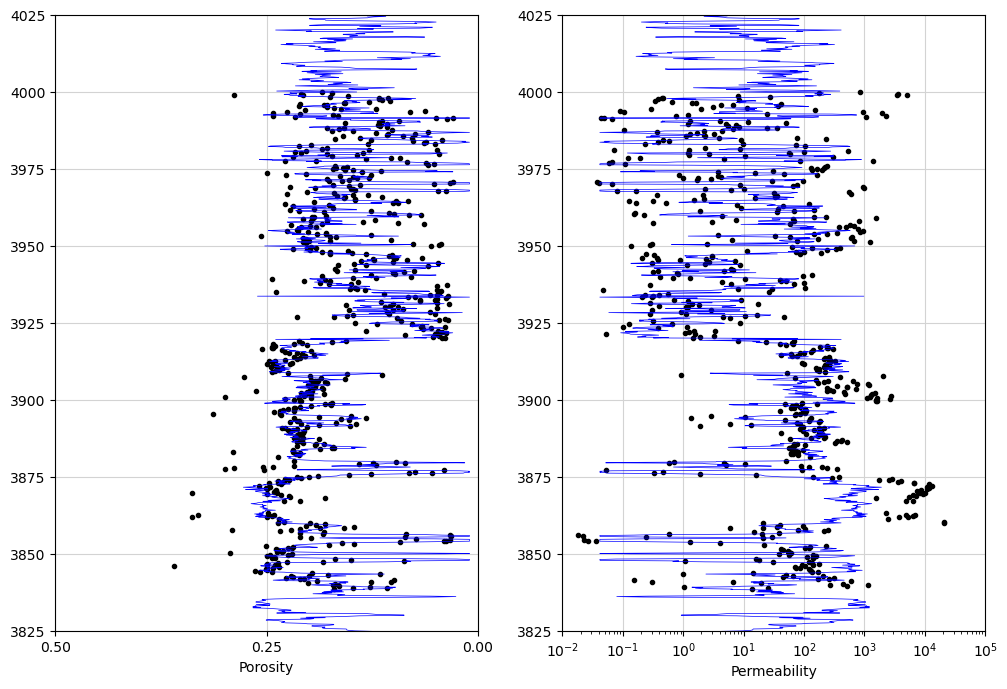

In [390]:
plt.figure(figsize=(12,8))

# Porosity track
plt.subplot(1, 2, 1) 
plt.plot(core_data["CPOR"]/100, core_data['DEPTH'], 'k.', linewidth=0)
plt.plot(well['PHIT'], well['DEPTH'], 'b-', linewidth=0.5)
plt.xlabel("Porosity", color="black")
plt.xlim(0.5, 0)
plt.ylim(3825,4025)
plt.xticks([0.5, 0.25, 0])
plt.grid(which='major', color='lightgrey', linestyle='-')
plt.tick_params(axis='x', colors="black")


# Permeability track
plt.subplot(1, 2, 2, sharey=plt.gca())  
plt.plot(core_data["CKHG"], core_data['DEPTH'], 'k.', linewidth=0)
plt.plot(well['PERM'], well['DEPTH'], 'b-', linewidth=0.5)
plt.xlabel("Permeability", color="black")
plt.xlim(0.1, 100000)
plt.xticks([0.01, 1, 10, 100, 10000])
plt.semilogx()
plt.grid(which='major', color='lightgrey', linestyle='-')
plt.tick_params(axis='x', colors="black")



As seen in track 2, our predicted permeability from a simple linear regression tracks the core permeability. The results are not so good but it is a nice starts.